In [25]:
import os

import matplotlib.image as mpimg
os.chdir('/home/suh/바탕화면/test_fish')

In [26]:
images = os.listdir('/home/suh/바탕화면/test_fish')

In [27]:
images

['img_00004.jpg', 'catalyst_s14_ep04_Yalata.mp4']

In [28]:
image_ALB = mpimg.imread("img_00004.jpg")

In [29]:
print("This image is: {0} with dimensions: {1}".format(type(image_ALB), image_ALB.shape))

This image is: <class 'numpy.ndarray'> with dimensions: (974, 1280, 3)


In [31]:
%matplotlib notebook


In [32]:
%matplotlib inline
import cv2
import matplotlib
from matplotlib import colors
from matplotlib import pyplot as plt
import numpy as np
from __future__ import division

In [33]:
def show(image):
    #Figure size in inches
    plt.figure(figsize=(15, 15))
    
    # Show image, with nearest neighbour interpolation
    plt.imshow(image, interpolation='nearest')
    
def show_hsv(hsv):
    rgb = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
    show(rgb)
    
def show_mask(mask):
    plt.figure(figsize=(10,10))
    plt.imshow(mask, cmap='gray')
    
def overly_mask(mask, image):
    rgb_mask = cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB)
    img = cv2.addWeighted(rgb_mask, 0.5, image, 0.5, 0)
    show(image)

In [34]:
image = cv2.imread('img_00004.jpg')

In [35]:
image

array([[[103, 104, 108],
        [104, 105, 109],
        [106, 108, 108],
        ..., 
        [ 20,  17,   9],
        [ 20,  17,   9],
        [ 20,  17,   9]],

       [[104, 105, 109],
        [105, 107, 108],
        [106, 108, 108],
        ..., 
        [ 20,  17,   9],
        [ 20,  17,   9],
        [ 20,  17,   9]],

       [[106, 108, 109],
        [106, 108, 108],
        [109, 110, 108],
        ..., 
        [ 20,  17,   9],
        [ 20,  17,   9],
        [ 20,  17,   9]],

       ..., 
       [[205, 222, 219],
        [198, 215, 212],
        [189, 203, 201],
        ..., 
        [ 16,  16,   4],
        [ 16,  16,   4],
        [ 16,  16,   4]],

       [[209, 226, 223],
        [202, 219, 216],
        [195, 209, 207],
        ..., 
        [ 16,  16,   4],
        [ 16,  16,   4],
        [ 16,  16,   4]],

       [[216, 233, 230],
        [207, 224, 221],
        [200, 214, 212],
        ..., 
        [ 16,  16,   4],
        [ 16,  16,   4],
        [ 16,  16,

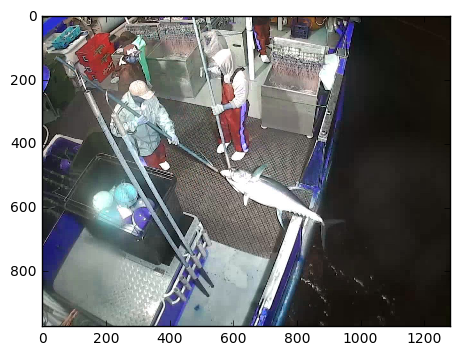

In [36]:
plt.imshow(image)

In [37]:
image.shape

(974, 1280, 3)

In [38]:
import pandas as pd
m,n,r = image.shape
arr = image.reshape(m*n, -1)
df = pd.DataFrame(arr, columns=['b','g','r'])
df.describe()

,b,g,r
count,1.246720e+06,1.246720e+06,1.246720e+06
mean,9.471243e+01,9.523641e+01,9.634796e+01
std,6.619213e+01,6.905750e+01,7.047955e+01
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.300000e+01,3.100000e+01,2.800000e+01
50%,8.100000e+01,8.000000e+01,8.700000e+01
75%,1.440000e+02,1.450000e+02,1.480000e+02
max,2.550000e+02,2.550000e+02,2.550000e+02


In [39]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image, None, fx=1/3, fy= 1/3)

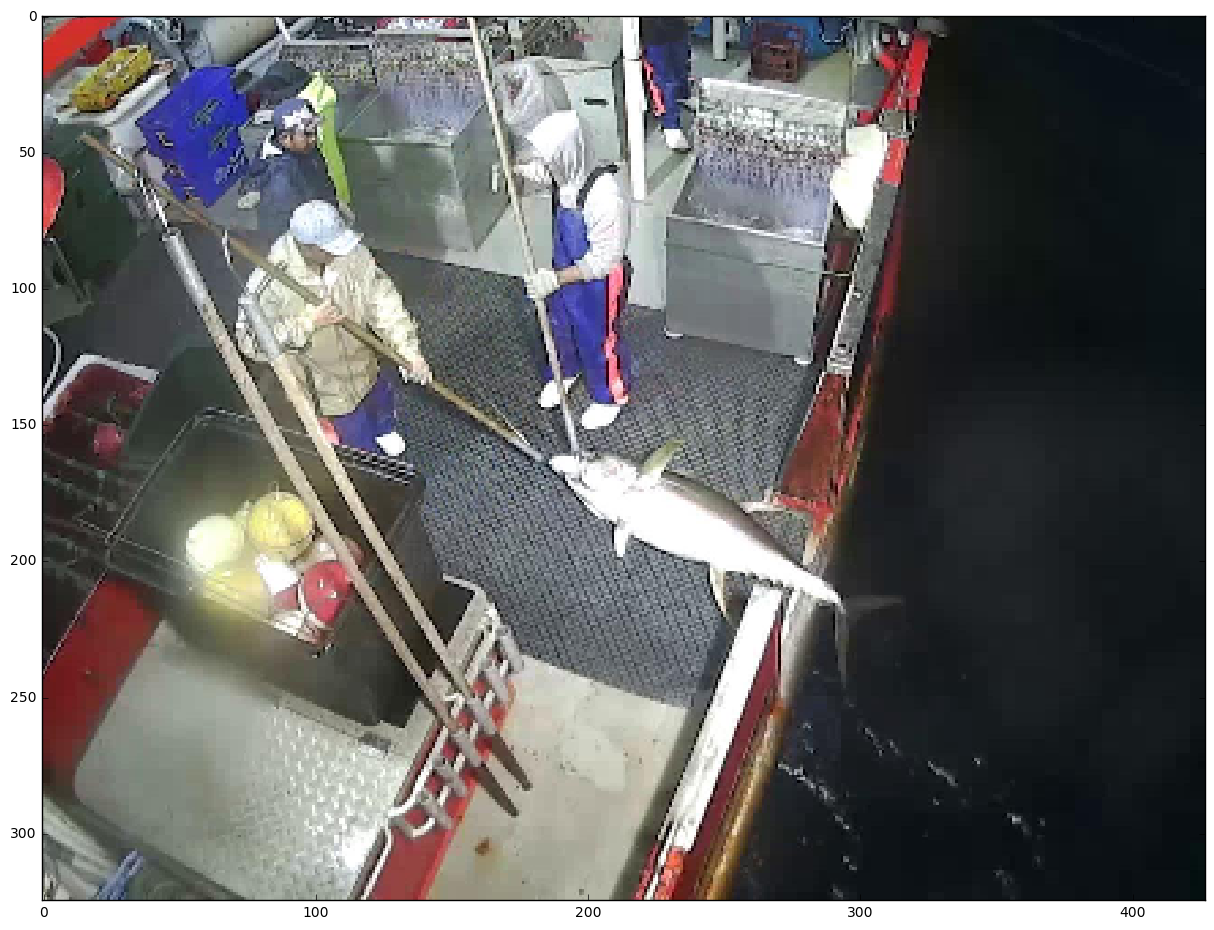

In [40]:
show(image)

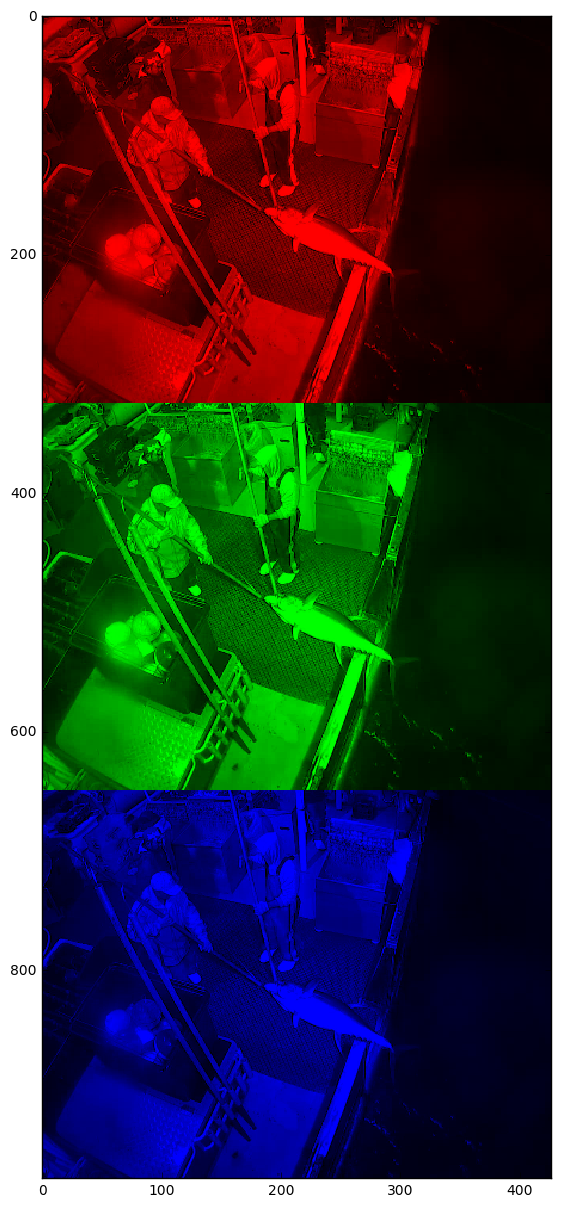

In [41]:
images = []
for i in [0,1,2]:
    colour = image.copy()
    if i != 0: colour[:,:,0] = 0
    if i != 1: colour[:,:,1] = 0
    if i != 2: colour[:,:,2] = 0
    
    images.append(colour)

show(np.vstack(images))

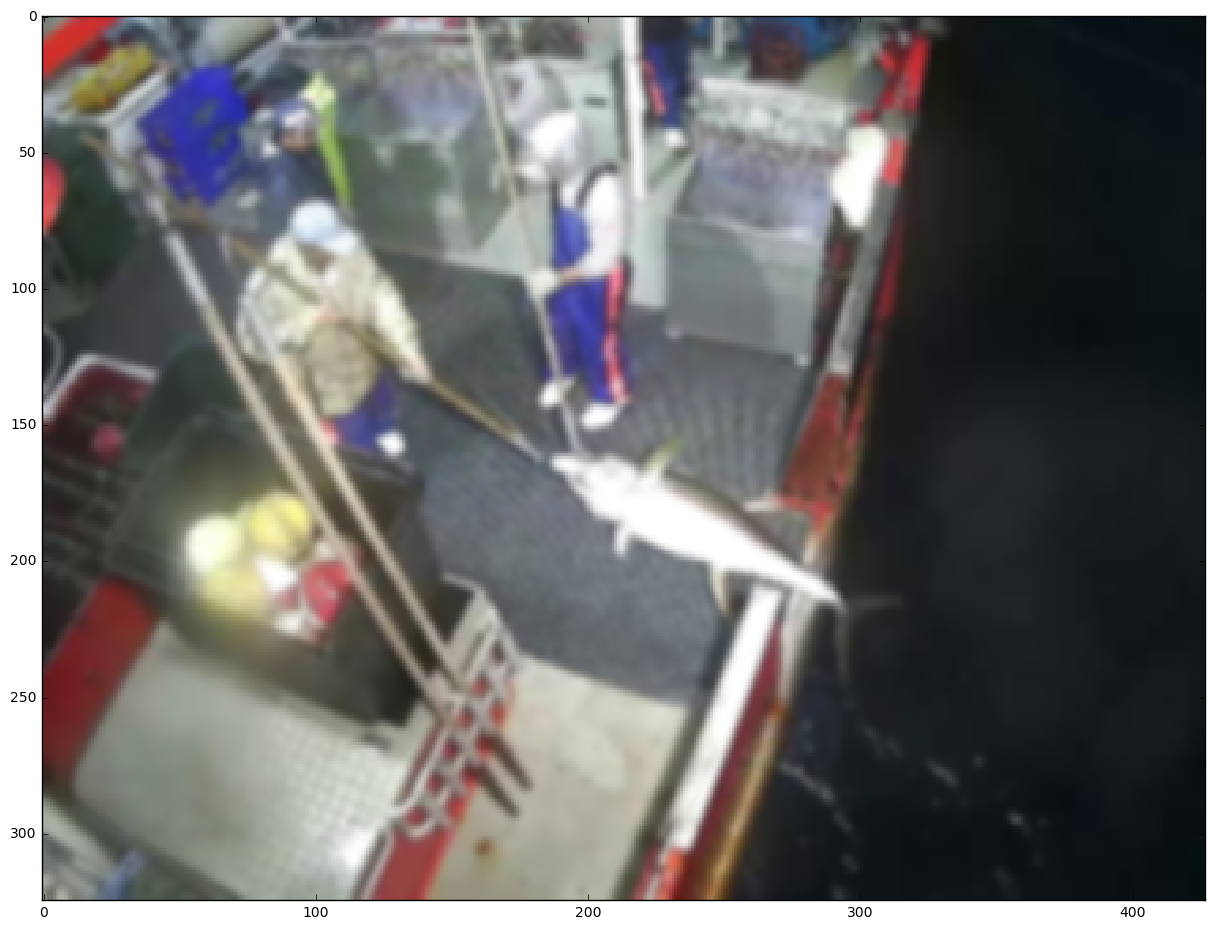

In [42]:
image_blur = cv2.GaussianBlur(image, (7, 7), 0)
show(image_blur)

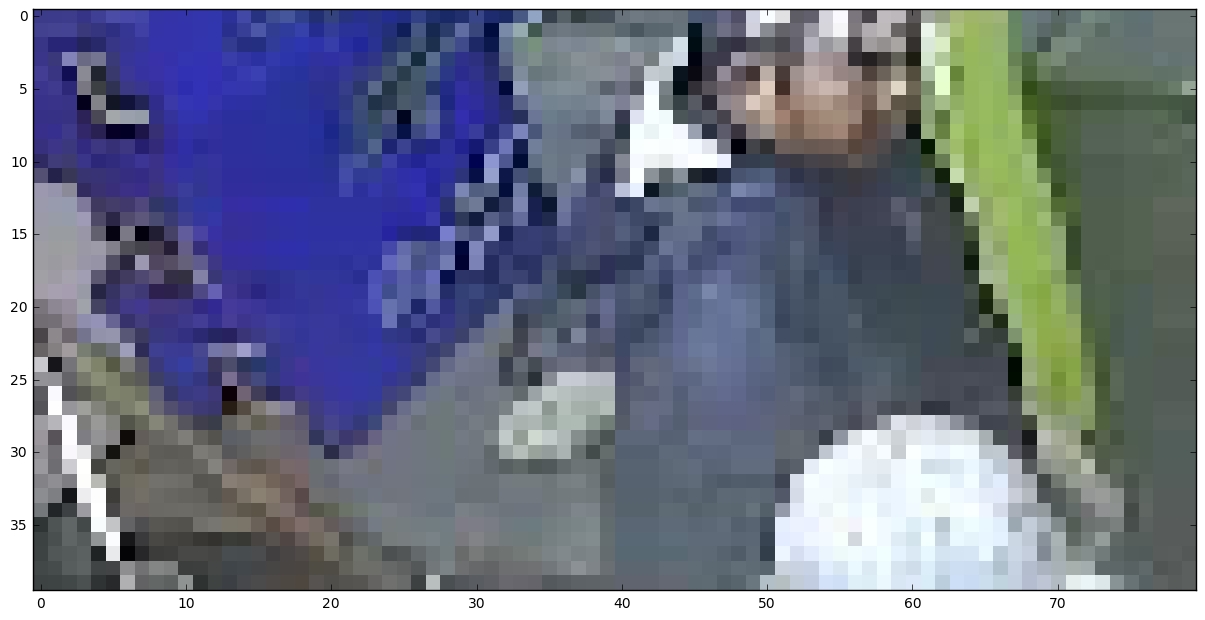

In [43]:
image_cropped = image[40:80, 40:120]
show(image_cropped)


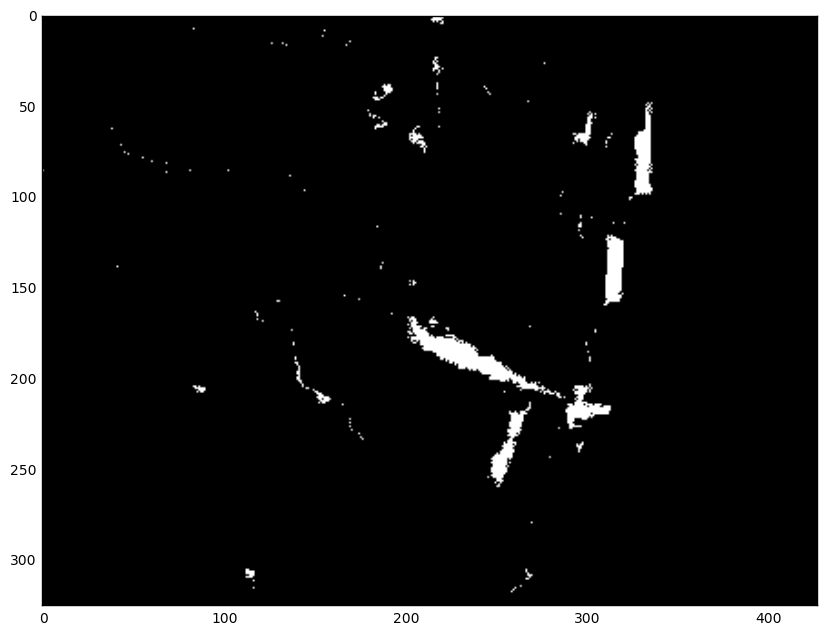

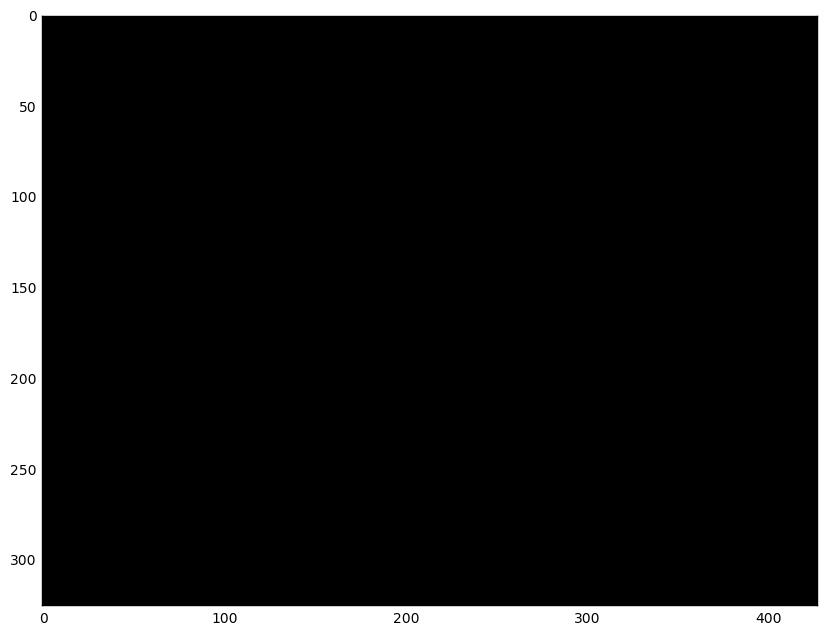

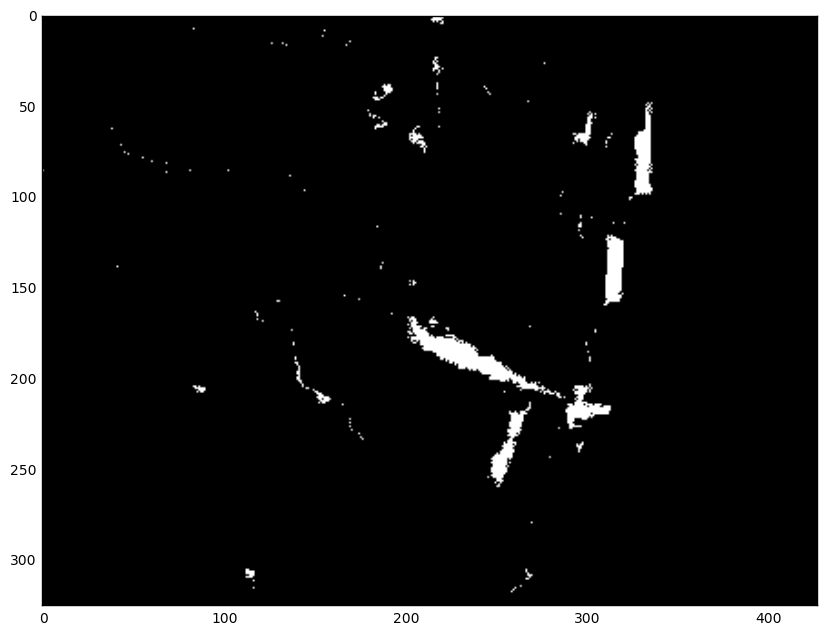

In [46]:
image_blur_hsv = cv2.cvtColor(image_blur, cv2.COLOR_RGB2HSV)

# 0-10 hue
min_white = np.array([0, 0, 0])
max_white = np.array([10, 0, 255])
image_white1 = cv2.inRange(image_blur_hsv, min_white, max_white)

# 170-180 hue
min_white2 = np.array([170, 0, 0])
max_white2 = np.array([180, 0, 255])
image_white2 = cv2.inRange(image_blur_hsv, min_white2, max_white2)

show_mask(image_white1)
show_mask(image_white2)
image_white = image_white1 + image_white2
show_mask(image_white)

In [48]:
image_white

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

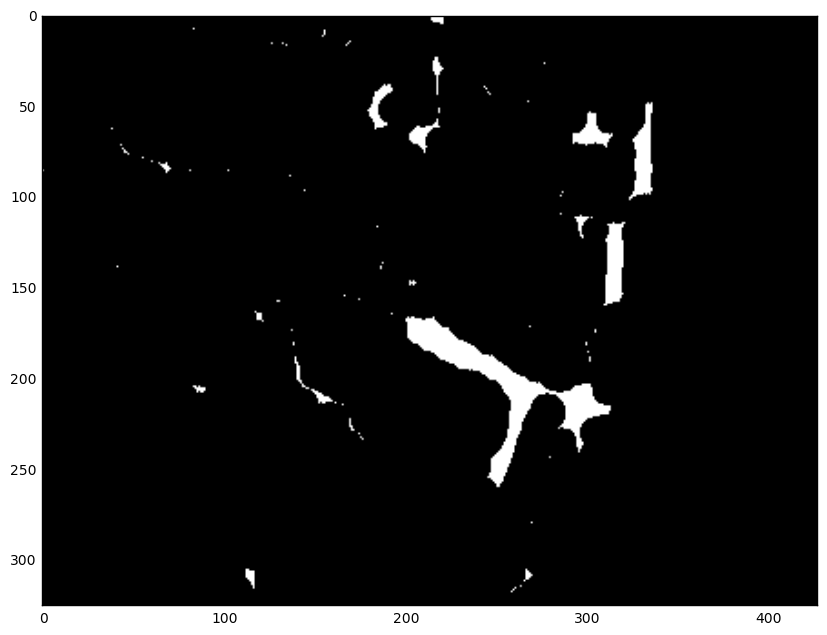

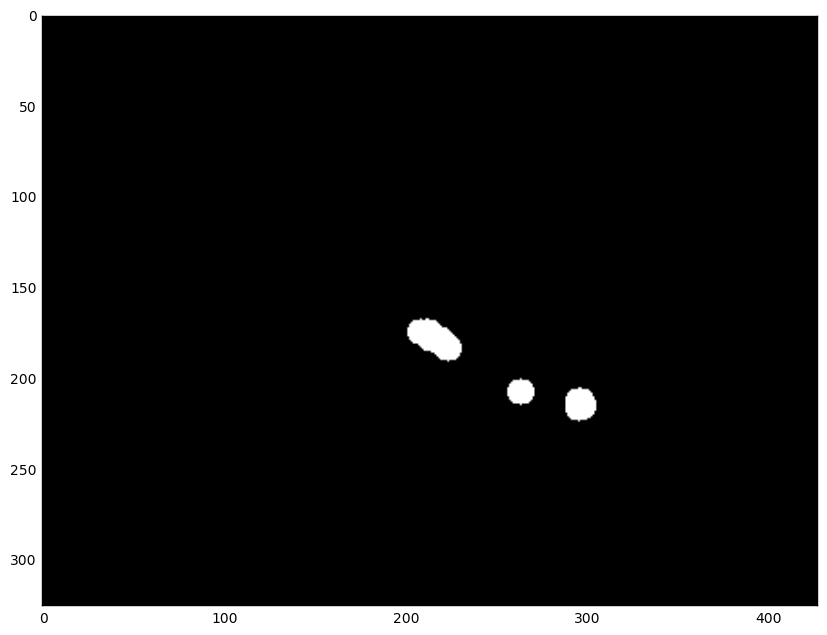

In [50]:
# Clean up
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (15, 15))

# image_red_eroded = cv2.morphologyEx(image_red, cv2.MORPH_ERODE, kernel)
# show_mask(image_red_eroded)

# image_red_dilated = cv2.morphologyEx(image_red, cv2.MORPH_DILATE, kernel)
# show_mask(image_red_dilated)

# image_red_opened = cv2.morphologyEx(image_red, cv2.MORPH_OPEN, kernel)
# show_mask(image_red_opened)

# Fill small gaps
image_white_closed = cv2.morphologyEx(image_white, cv2.MORPH_CLOSE, kernel)
show_mask(image_white_closed)

# Remove specks
image_white_closed_then_opened = cv2.morphologyEx(image_white_closed, cv2.MORPH_OPEN, kernel)
show_mask(image_white_closed_then_opened)

3


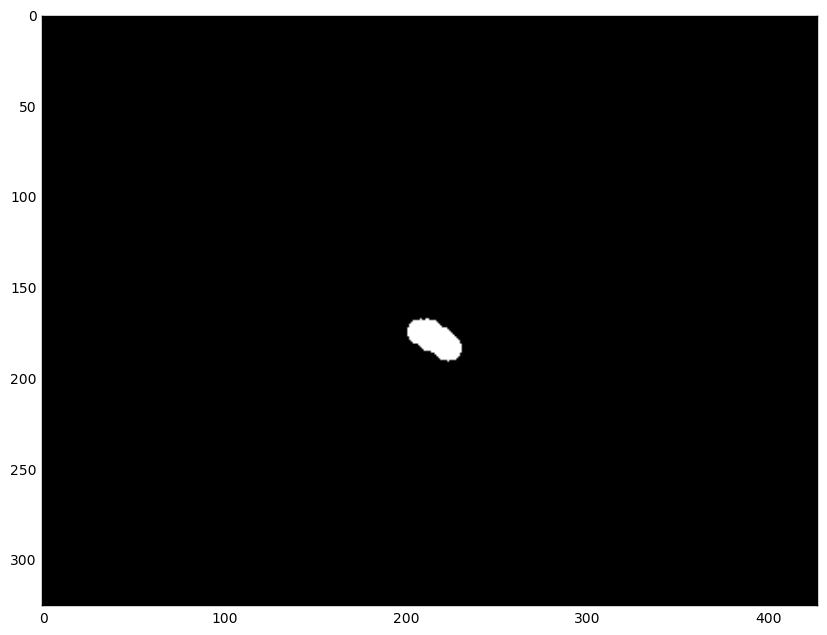

In [52]:
def find_biggest_contour(image):
    
    # Copy to prevent modification
    image = image.copy()
    image,contours, hierarchy = cv2.findContours(image, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    print(len(contours))

    # Isolate largest contour
    contour_sizes = [(cv2.contourArea(contour), contour) for contour in contours]
    biggest_contour = max(contour_sizes, key=lambda x: x[0])[1]
 
    mask = np.zeros(image.shape, np.uint8)
    cv2.drawContours(mask, [biggest_contour], -1, 255, -1)
    return biggest_contour, mask

big_contour, white_mask = find_biggest_contour(image_white_closed_then_opened)
show_mask(white_mask)

In [66]:
plt.imshow(overlay_mask(white_mask, image))

error: /root/mc-x64-2.7/conda-bld/opencv-3_1482254119970/work/opencv-3.1.0/modules/core/src/arithm.cpp:639: error: (-209) The operation is neither 'array op array' (where arrays have the same size and the same number of channels), nor 'array op scalar', nor 'scalar op array' in function arithm_op


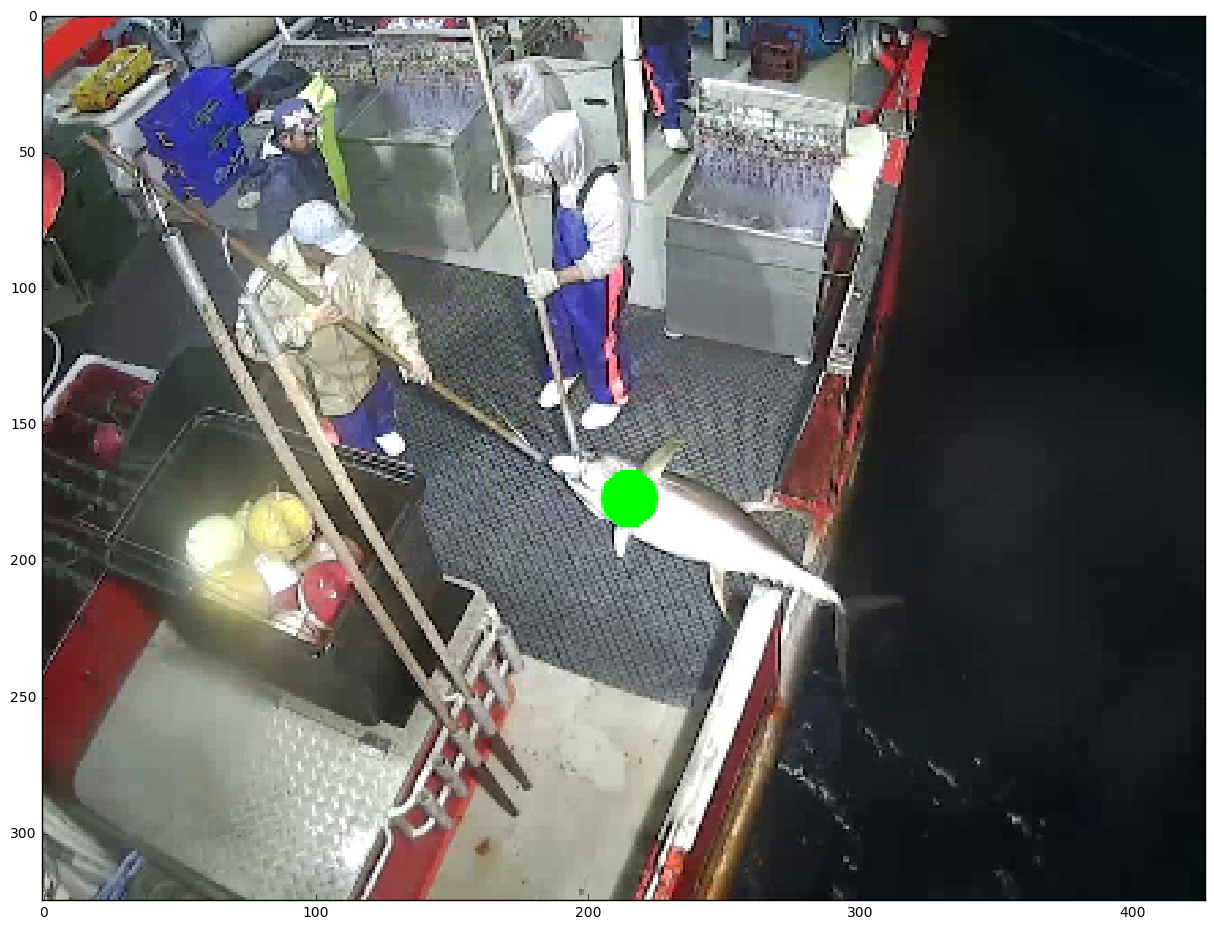

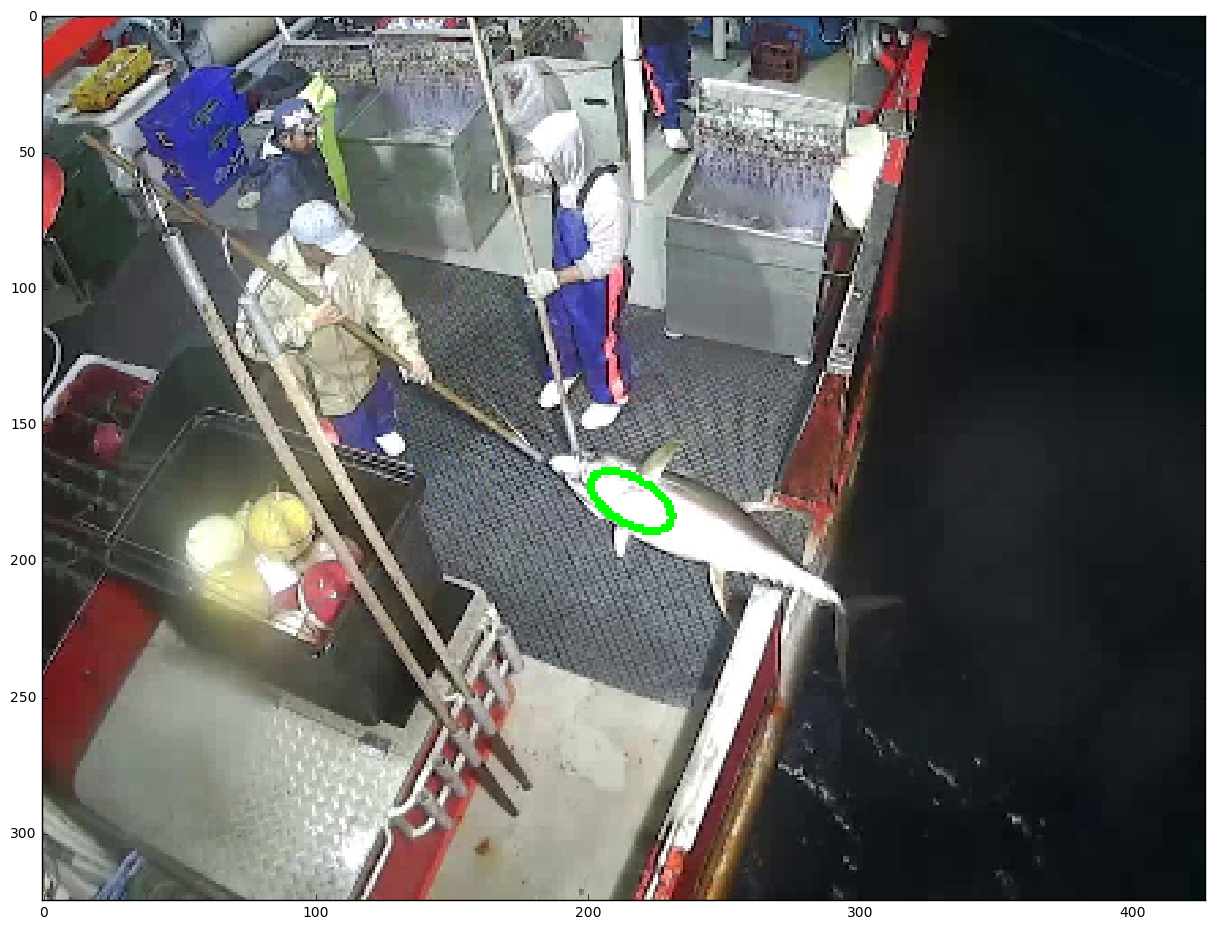

In [56]:
# Centre of mass
moments = cv2.moments(white_mask)
centre_of_mass = int(moments['m10'] / moments['m00']), int(moments['m01'] / moments['m00'])
image_with_com = image.copy()
cv2.circle(image_with_com, centre_of_mass, 10, (0, 255, 0), -1,cv2.LINE_AA)
show(image_with_com)

# Bounding ellipse
image_with_ellipse = image.copy()
ellipse = cv2.fitEllipse(big_contour)
cv2.ellipse(image_with_ellipse, ellipse, (0,255,0), 2)
show(image_with_ellipse)

In [57]:
from __future__ import division
import cv2
#to show the image
from matplotlib import pyplot as plt
import numpy as np
from math import cos, sin

green = (0, 255, 0)

def show(image):
    # Figure size in inches
    plt.figure(figsize=(10, 10))

    # Show image, with nearest neighbour interpolation
    plt.imshow(image, interpolation='nearest')

def overlay_mask(mask, image):
	#make the mask rgb
    rgb_mask = cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB)
    #calculates the weightes sum of two arrays. in our case image arrays
    #input, how much to weight each. 
    #optional depth value set to 0 no need
    img = cv2.addWeighted(rgb_mask, 0.5, image, 0.5, 0)
    return img

def find_biggest_contour(image):
    # Copy
    image = image.copy()
    #input, gives all the contours, contour approximation compresses horizontal, 
    #vertical, and diagonal segments and leaves only their end points. For example, 
    #an up-right rectangular contour is encoded with 4 points.
    #Optional output vector, containing information about the image topology. 
    #It has as many elements as the number of contours.
    #we dont need it
    image, contours, hierarchy = cv2.findContours(image, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

    # Isolate largest contour
    contour_sizes = [(cv2.contourArea(contour), contour) for contour in contours]
    biggest_contour = max(contour_sizes, key=lambda x: x[0])[1]

    mask = np.zeros(image.shape, np.uint8)
    cv2.drawContours(mask, [biggest_contour], -1, 255, -1)
    return biggest_contour, mask

def circle_contour(image, contour):
    # Bounding ellipse
    image_with_ellipse = image.copy()
    #easy function
    ellipse = cv2.fitEllipse(contour)
    #add it
    cv2.ellipse(image_with_ellipse, ellipse, green, 2, cv2.LINE_AA)
    return image_with_ellipse

In [58]:
def find_fish(image):
    #RGB stands for Red Green Blue. Most often, an RGB color is stored 
    #in a structure or unsigned integer with Blue occupying the least 
    #significant “area” (a byte in 32-bit and 24-bit formats), Green the 
    #second least, and Red the third least. BGR is the same, except the 
    #order of areas is reversed. Red occupies the least significant area,
    # Green the second (still), and Blue the third.
    # we'll be manipulating pixels directly
    #most compatible for the transofrmations we're about to do
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Make a consistent size
    #get largest dimension
    max_dimension = max(image.shape)
    #The maximum window size is 700 by 660 pixels. make it fit in that
    scale = 700/max_dimension
    #resize it. same width and hieght none since output is 'image'.
    image = cv2.resize(image, None, fx=scale, fy=scale)
    
    #we want to eliminate noise from our image. clean. smooth colors without
    #dots
    # Blurs an image using a Gaussian filter. input, kernel size, how much to filter, empty)
    image_blur = cv2.GaussianBlur(image, (7, 7), 0)
    #t unlike RGB, HSV separates luma, or the image intensity, from
    # chroma or the color information.
    #just want to focus on color, segmentation
    image_blur_hsv = cv2.cvtColor(image_blur, cv2.COLOR_RGB2HSV)

    # Filter by colour
    # 0-10 hue
    #minimum red amount, max red amount
    min_white = np.array([0, 0, 0])
    max_white = np.array([10, 0, 255])
    #layer
    mask1 = cv2.inRange(image_blur_hsv, min_white, max_white)

    #birghtness of a color is hue
    # 170-180 hue
    min_red2 = np.array([170, 0, 0])
    max_red2 = np.array([180, 0, 255])
    mask2 = cv2.inRange(image_blur_hsv, min_white2, max_white2)


    
    
    
    #looking for what is in both ranges
    # Combine masks
    mask = mask1 + mask2

    # Clean up
    #we want to circle our strawberry so we'll circle it with an ellipse
    #with a shape of 15x15
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (15, 15))
    #morph the image. closing operation Dilation followed by Erosion. 
    #It is useful in closing small holes inside the foreground objects, 
    #or small black points on the object.
    mask_closed = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
    #erosion followed by dilation. It is useful in removing noise
    mask_clean = cv2.morphologyEx(mask_closed, cv2.MORPH_OPEN, kernel)

    # Find biggest strawberry
    #get back list of segmented strawberries and an outline for the biggest one
    big_strawberry_contour, mask_strawberries = find_biggest_contour(mask_clean)

    # Overlay cleaned mask on image
    # overlay mask on image, strawberry now segmented
    overlay = overlay_mask(mask_clean, image)

    # Circle biggest strawberry
    #circle the biggest one
    circled = circle_contour(overlay, big_strawberry_contour)
    show(circled)
    
    #we're done, convert back to original color scheme
    bgr = cv2.cvtColor(circled, cv2.COLOR_RGB2BGR)
    
    return bgr

OSError: cannot identify image file '/home/suh/바탕화면/test_fish/catalyst_s14_ep04_Yalata.mp4'

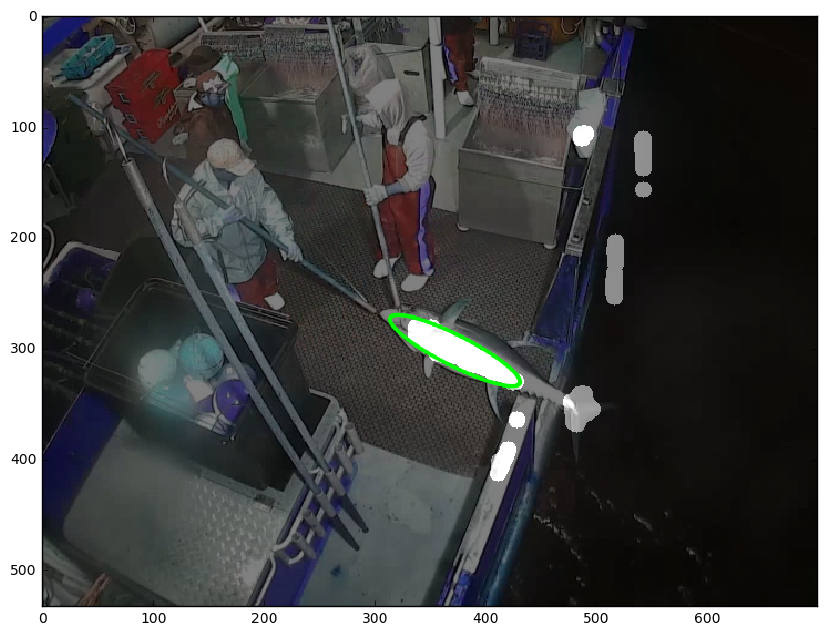

In [59]:
# Write output images to file and display them
import os
import pygame
images = os.listdir("/home/suh/바탕화면/test_fish/")

fig = plt.figure(figsize=(20, 8))

final_images = []


for idx,val in enumerate(images):
    #reading in an image
    image = mpimg.imread('/home/suh/바탕화면/test_fish/' + images[idx])
    final_images.append(find_fish(image))
    
    
    #Write images to file
    #mpimg.imsave('test_images/' + images[idx][:-4] + 'Extrapolated.jpg',final_images[idx])

# Create subplots in figure
for r in range(1,len(final_images)+1):
    fig.add_subplot(2,3,r)
    plt.imshow(final_images[r-1])


plt.show()

In [ ]:
from moviepy.editor import *

In [60]:
import imageio
imageio.plugins.ffmpeg.download()

In [61]:
from moviepy.editor import VideoFileClip
from IPython.display import HTML

In [64]:
def process_image(image):
    # NOTE: The output you return should be a color image (3 channel) for processing video below
    # TODO: put your pipeline here,
    # you should return the final output (image with lines are drawn on lanes)
  
    result = find_fish(image)

    return result

In [65]:
white_output = 'ocean_fishery.mp4'
clip1 = VideoFileClip("catalyst_s14_ep04_Yalata.mp4")
white_clip = clip1.fl_image(process_image) #NOTE: this function expects color images!!
%time white_clip.write_videofile(white_output, audio=False)

error: /root/mc-x64-2.7/conda-bld/opencv-3_1482254119970/work/opencv-3.1.0/modules/imgproc/src/shapedescr.cpp:350: error: (-201) There should be at least 5 points to fit the ellipse in function fitEllipse
